# Kerala EDA using Monthly Data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
from sklearn.metrics import mean_squared_error,r2_score

In [ ]:
df=pd.read_csv('kerala.csv')

In [ ]:
from datetime import datetime

df['Date'] = pd.to_datetime(df['Date'] + '-01')

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
df[['Hotel Revenue','Search Index','Tourist Arrivals']]= scaler.fit_transform(df[['Hotel Revenue','Search Index','Tourist Arrivals']])

In [ ]:
df

,Date,Search Index,Tourist Arrivals,Hotel Revenue
0,2010-01-01,0.056653,-0.535470,-0.672093
1,2010-02-01,-0.907481,-0.707252,-0.238536
2,2010-03-01,-0.425414,-0.709475,0.190945
3,2010-04-01,-1.228858,-0.682090,-1.070391
4,2010-05-01,1.342165,-0.561859,-1.604585
...,...,...,...,...
151,2022-08-01,1.984920,0.702617,0.315325
152,2022-09-01,1.020787,0.850930,0.702815
153,2022-10-01,1.342165,1.156966,1.260397
154,2022-11-01,1.663543,1.067486,1.576838


# QQ Plots for the different features

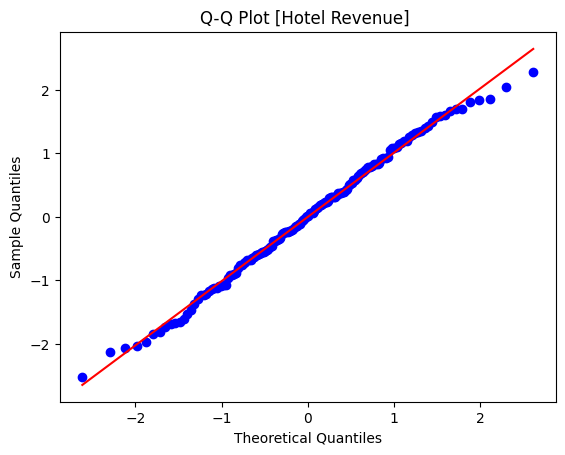

In [ ]:
stats.probplot(df['Hotel Revenue'],dist='norm',plot=plt)
plt.title("Q-Q Plot [Hotel Revenue] ")
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Sample Quantiles")
plt.show()

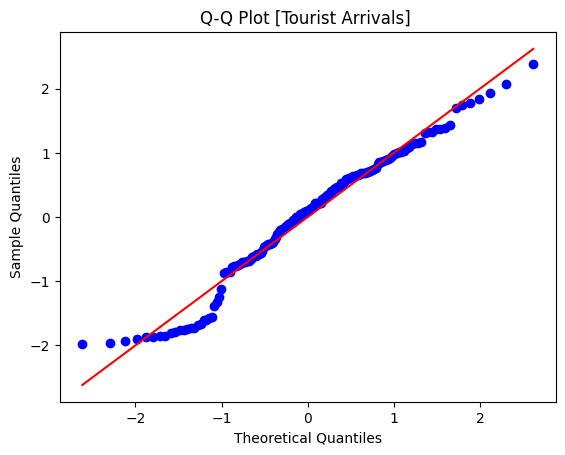

In [ ]:
stats.probplot(df['Tourist Arrivals'],dist='norm',plot=plt)
plt.title("Q-Q Plot [Tourist Arrivals] ")
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Sample Quantiles")
plt.show()

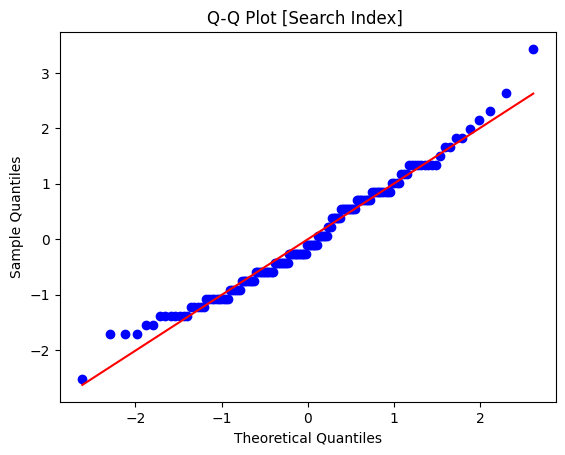

In [ ]:
stats.probplot(df['Search Index'],dist='norm',plot=plt)
plt.title("Q-Q Plot [Search Index] ")
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Sample Quantiles")
plt.show()

# Correlation Heatmap

<ipython-input-145-25d9ba9689ff>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


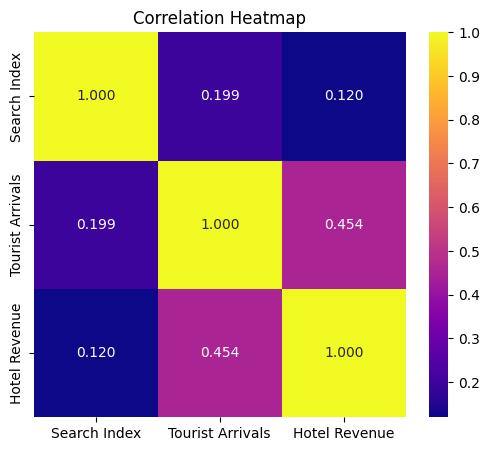

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = df.corr()

plt.figure(figsize=(6, 5))

sns.heatmap(corr_matrix, annot=True, cmap='plasma', fmt=".3f")

plt.title("Correlation Heatmap")

plt.show()


# Normal Plots

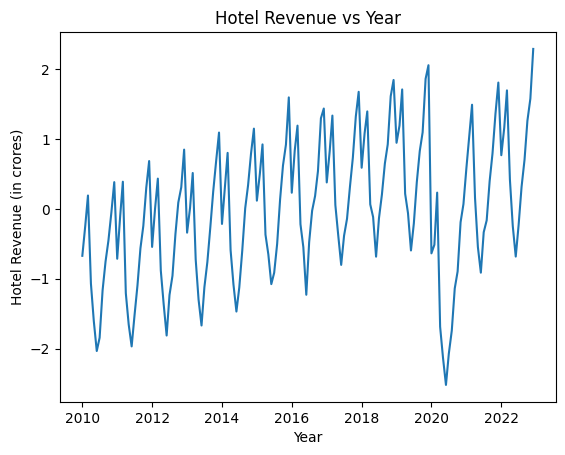

In [ ]:
plt.plot(df['Date'],df['Hotel Revenue'])
plt.title("Hotel Revenue vs Year")
plt.xlabel("Year")
plt.ylabel("Hotel Revenue (in crores)")
plt.show()

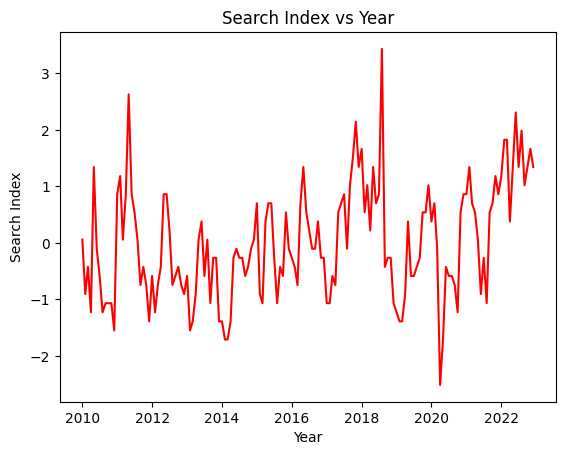

In [ ]:
plt.plot(df['Date'],df['Search Index'],c='r')
plt.title("Search Index vs Year")
plt.xlabel("Year")
plt.ylabel("Search Index")
plt.show()

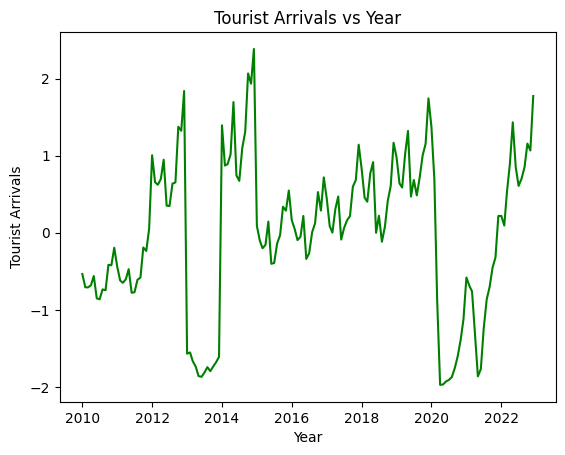

In [ ]:
plt.plot(df['Date'],df['Tourist Arrivals'],c='g')
plt.title("Tourist Arrivals vs Year")
plt.xlabel("Year")
plt.ylabel("Tourist Arrivals")
plt.show()

# Seasonality Decomposition

In [ ]:
from statsmodels.tsa.seasonal import STL

### Hotel Revenue

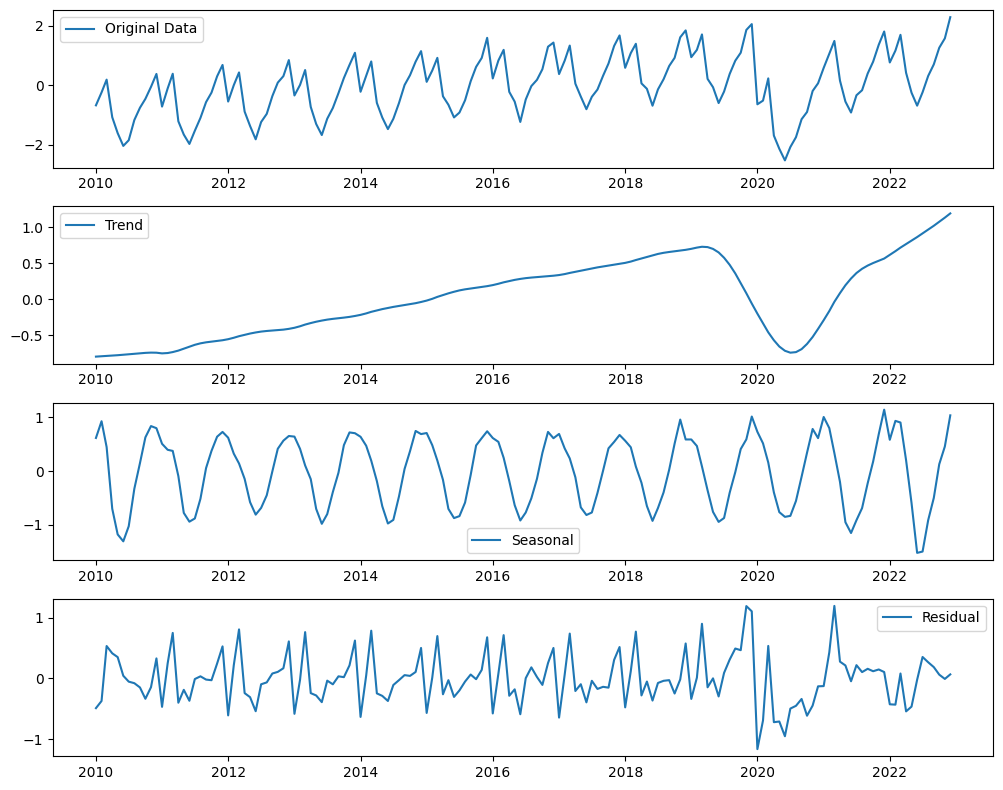

In [ ]:
# Perform STL decomposition
stl = STL(df['Hotel Revenue'], 13)  # 'seasonal' parameter is set to 13 for monthly data

result = stl.fit()

# Extract the components
trend, seasonal, residual = result.trend, result.seasonal, result.resid

# Plot the components
plt.figure(figsize=(10, 8))

plt.subplot(411)
plt.plot(df['Date'],df['Hotel Revenue'], label='Original Data')
plt.legend()

plt.subplot(412)
plt.plot(df['Date'],trend, label='Trend')
plt.legend()

plt.subplot(413)
plt.plot(df['Date'],seasonal, label='Seasonal')
plt.legend()

plt.subplot(414)
plt.plot(df['Date'],residual, label='Residual')
plt.legend()

plt.tight_layout()
plt.show()


### Search Index

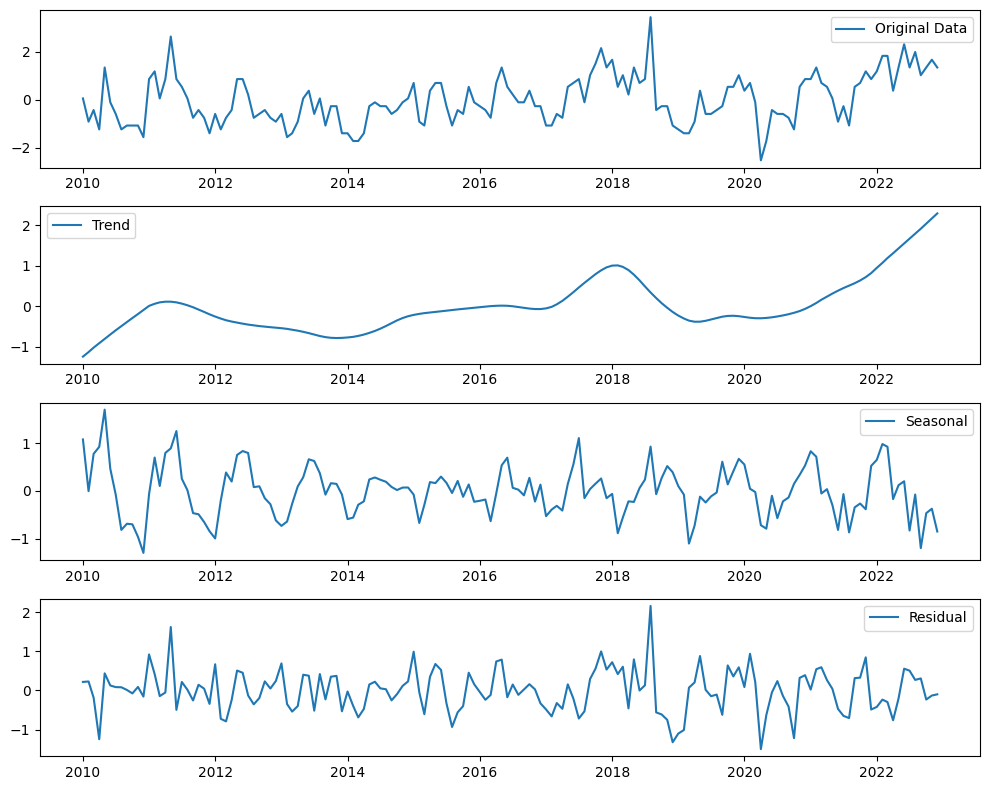

In [ ]:
# Perform STL decomposition
stl = STL(df['Search Index'], 13)  # 'seasonal' parameter is set to 13 for monthly data

result = stl.fit()

# Extract the components
trend, seasonal, residual = result.trend, result.seasonal, result.resid

# Plot the components
plt.figure(figsize=(10, 8))

plt.subplot(411)
plt.plot(df['Date'],df['Search Index'], label='Original Data')
plt.legend()

plt.subplot(412)
plt.plot(df['Date'],trend, label='Trend')
plt.legend()

plt.subplot(413)
plt.plot(df['Date'],seasonal, label='Seasonal')
plt.legend()

plt.subplot(414)
plt.plot(df['Date'],residual, label='Residual')
plt.legend()

plt.tight_layout()
plt.show()


### Tourist Arrivals

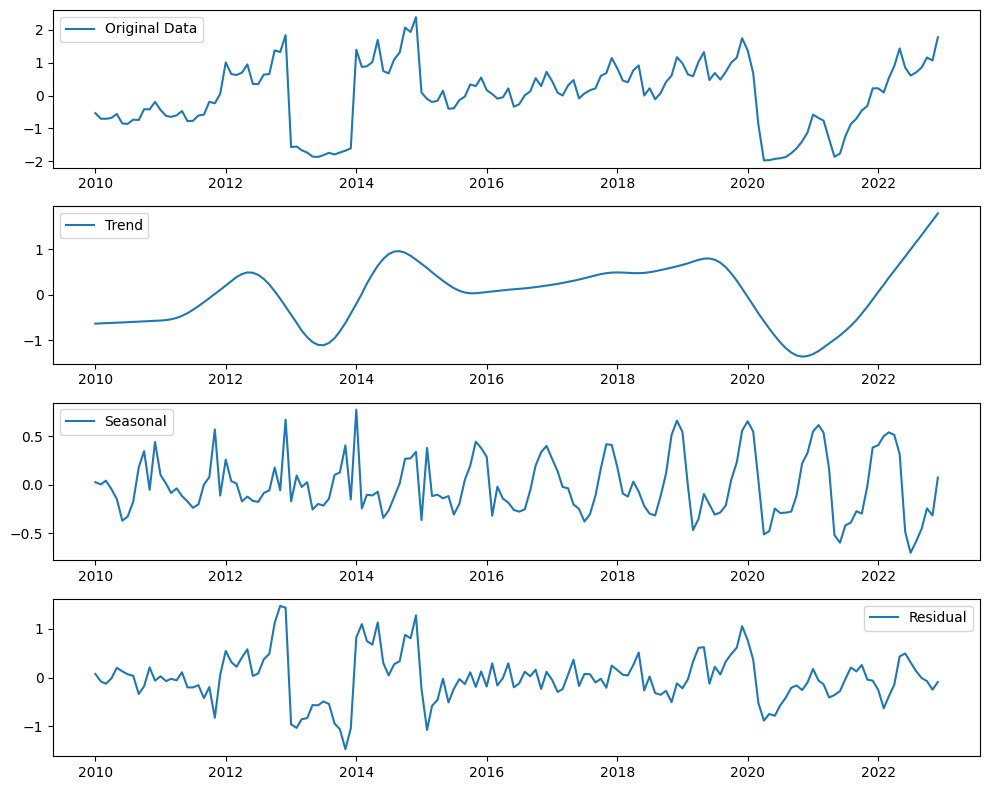

In [ ]:
# Perform STL decomposition
stl = STL(df['Tourist Arrivals'], 13)  # 'seasonal' parameter is set to 13 for monthly data

result = stl.fit()

# Extract the components
trend, seasonal, residual = result.trend, result.seasonal, result.resid

# Plot the components
plt.figure(figsize=(10, 8))

plt.subplot(411)
plt.plot(df['Date'],df['Tourist Arrivals'], label='Original Data')
plt.legend()

plt.subplot(412)
plt.plot(df['Date'],trend, label='Trend')
plt.legend()

plt.subplot(413)
plt.plot(df['Date'],seasonal, label='Seasonal')
plt.legend()

plt.subplot(414)
plt.plot(df['Date'],residual, label='Residual')
plt.legend()

plt.tight_layout()
plt.show()


# Pair Plots

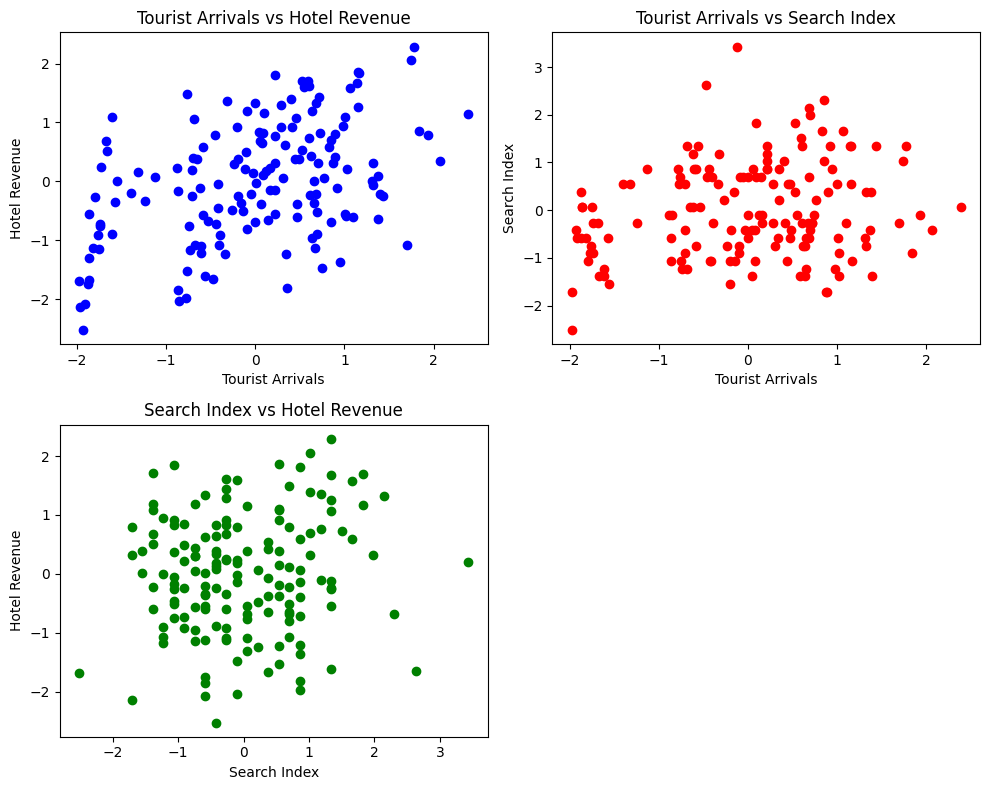

In [ ]:
plt.figure(figsize=(10, 8))

# Plot 1
plt.subplot(2, 2, 1)
plt.scatter(df['Tourist Arrivals'], df['Hotel Revenue'],c='b')
plt.xlabel('Tourist Arrivals')
plt.ylabel('Hotel Revenue')
plt.title('Tourist Arrivals vs Hotel Revenue')

# Plot 2
plt.subplot(2, 2, 2)
plt.scatter(df['Tourist Arrivals'], df['Search Index'],c='r')
plt.xlabel('Tourist Arrivals')
plt.ylabel('Search Index')
plt.title('Tourist Arrivals vs Search Index')

# Plot 3
plt.subplot(2, 2, 3)
plt.scatter(df['Search Index'], df['Hotel Revenue'],c='g')
plt.xlabel('Search Index')
plt.ylabel('Hotel Revenue')
plt.title('Search Index vs Hotel Revenue')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()

# ACF and PACF

### Hotel Revenue

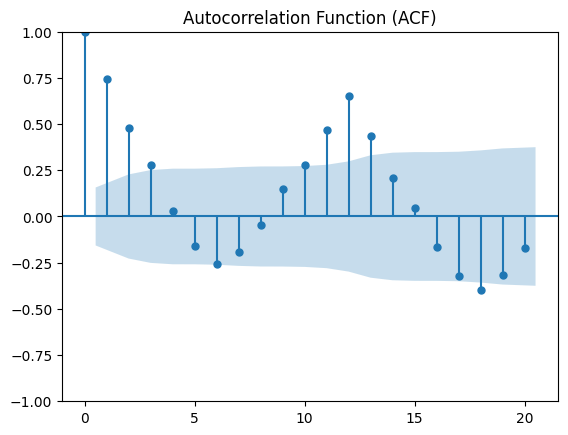

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF
plot_acf(df['Hotel Revenue'], lags=20)
plt.title("Autocorrelation Function (ACF)")
plt.show()


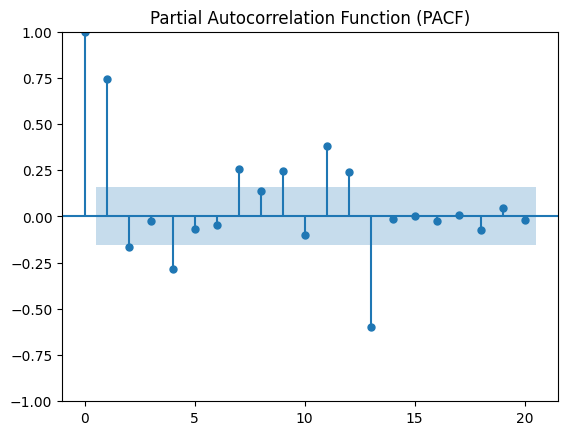

In [ ]:
# Plot PACF
plot_pacf(df['Hotel Revenue'], lags=20)
plt.title("Partial Autocorrelation Function (PACF)")
plt.show()

### Search Index

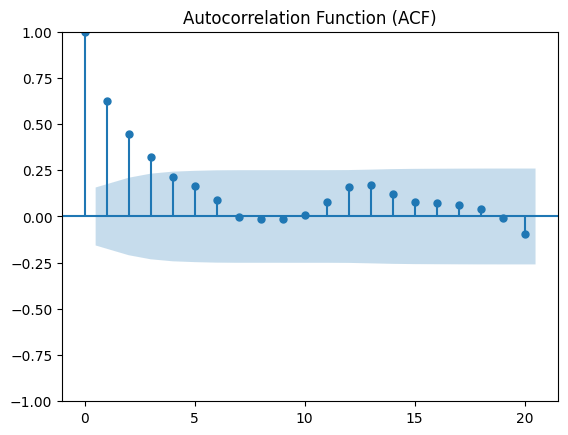

In [ ]:
# Plot ACF
plot_acf(df['Search Index'], lags=20)
plt.title("Autocorrelation Function (ACF)")
plt.show()

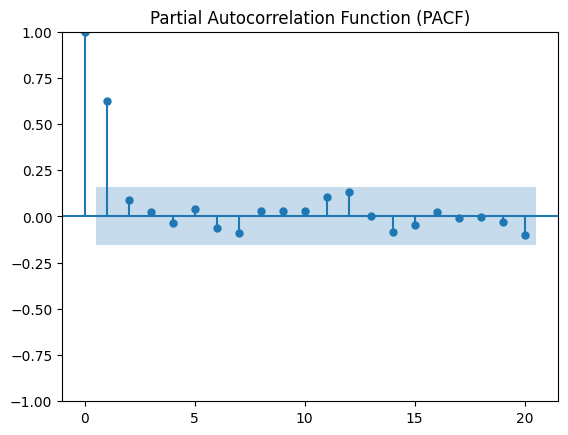

In [ ]:
# Plot PACF
plot_pacf(df['Search Index'], lags=20)
plt.title("Partial Autocorrelation Function (PACF)")
plt.show()

### Tourist Arrivals

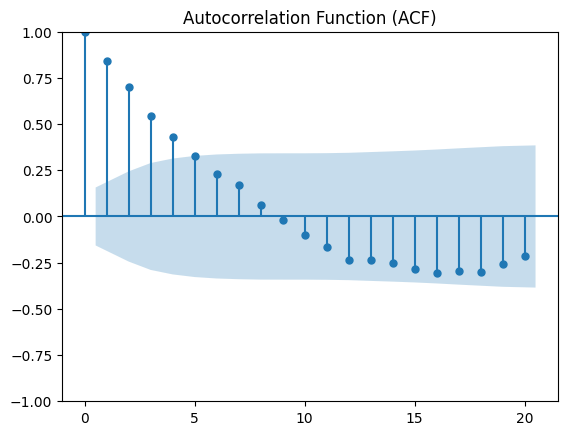

In [ ]:
# Plot ACF
plot_acf(df['Tourist Arrivals'], lags=20)
plt.title("Autocorrelation Function (ACF)")
plt.show()

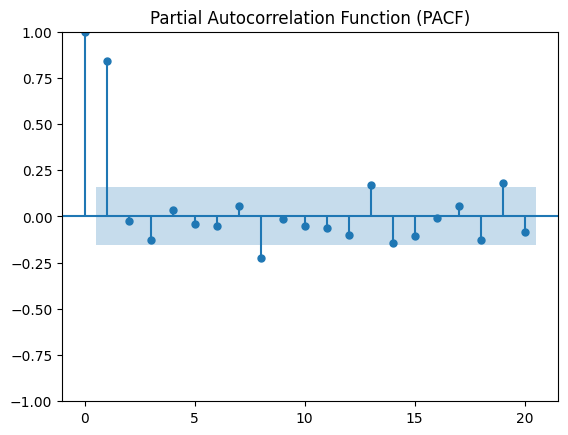

In [ ]:
# Plot PACF
plot_pacf(df['Tourist Arrivals'], lags=20)
plt.title("Partial Autocorrelation Function (PACF)")
plt.show()

# Box Plot

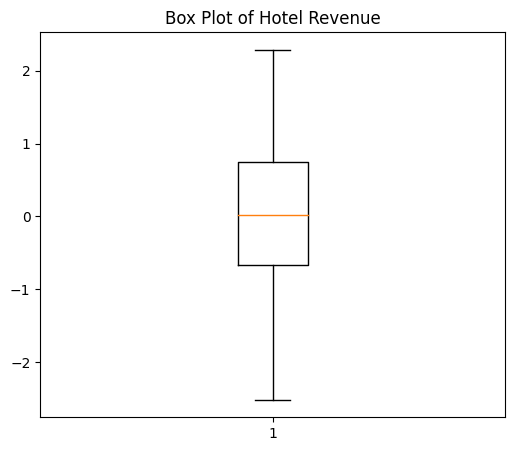

In [ ]:
plt.figure(figsize=(6, 5))
plt.boxplot(df['Hotel Revenue'])
plt.title("Box Plot of Hotel Revenue")
plt.show()

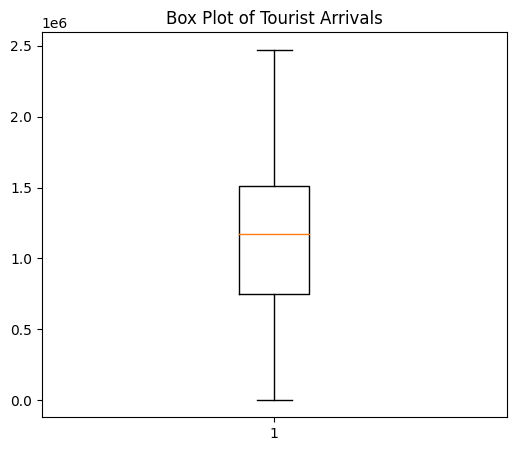

In [ ]:
plt.figure(figsize=(6, 5))
plt.boxplot(df['Tourist Arrivals'])
plt.title("Box Plot of Tourist Arrivals")
plt.show()

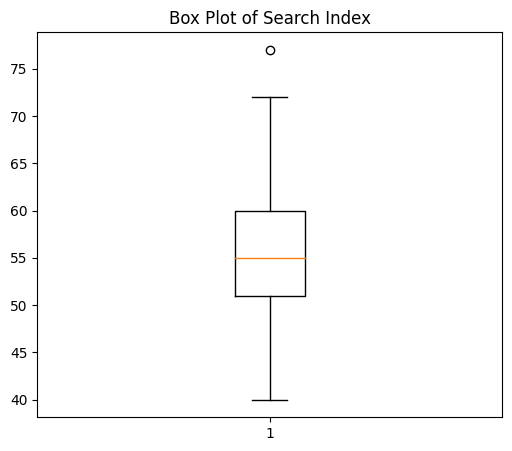

In [ ]:
plt.figure(figsize=(6, 5))
plt.boxplot(df['Search Index'])
plt.title("Box Plot of Search Index")
plt.show()

# Violin Plots

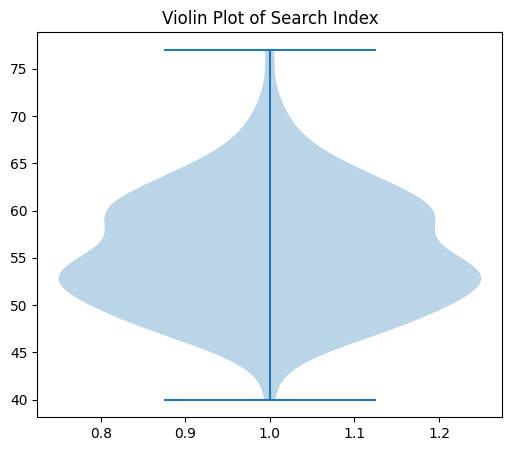

In [ ]:
plt.figure(figsize=(6, 5))
plt.violinplot(df['Search Index'])
plt.title("Violin Plot of Search Index")
plt.show()

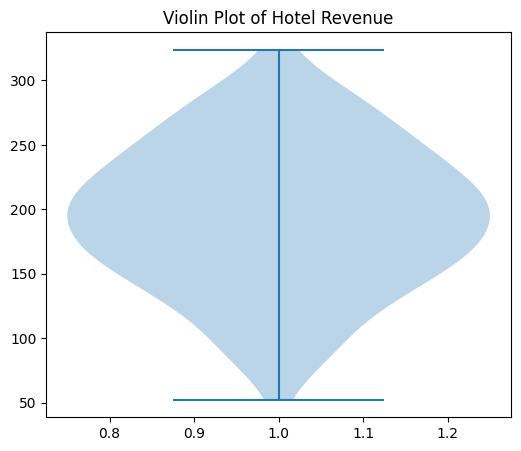

In [ ]:
plt.figure(figsize=(6, 5))
plt.violinplot(df['Hotel Revenue'])
plt.title("Violin Plot of Hotel Revenue")
plt.show()

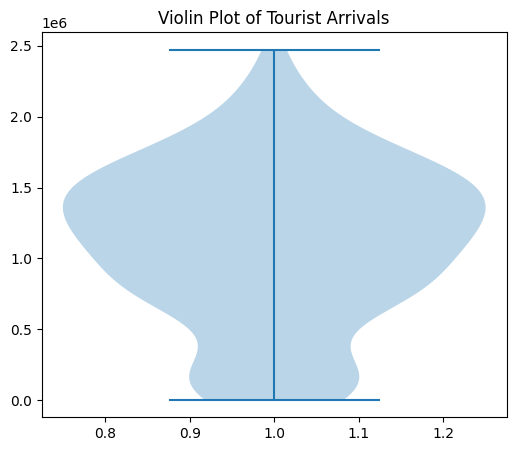

In [ ]:
plt.figure(figsize=(6, 5))
plt.violinplot(df['Tourist Arrivals'])
plt.title("Violin Plot of Tourist Arrivals")
plt.show()